In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import random

In [2]:
class Node:
    def __init__(self):
        self.neighbours = []
        self.choice = random.randint(0, 1)

In [3]:
def averageEdges(net):
    x = 0
    for n in net:
        x+=len(n.neighbours)
    return x/len(net)

def Generate(N):
    k = 0
    net = []
    for i in range(N):
        net.append(Node())
    while averageEdges(net)<4:
        n1 = net[random.randint(0,len(net)-1)]
        n2 = net[random.randint(0,len(net)-1)]
        if n1 not in n2.neighbours:
            if n1 != n2:
                n1.neighbours.append(n2)
                n2.neighbours.append(n1)
                k+=1
                

    return net, k

In [4]:
net, k = Generate(10000)

print("k  "+str(k))

k  20000


C:\Users\Leen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


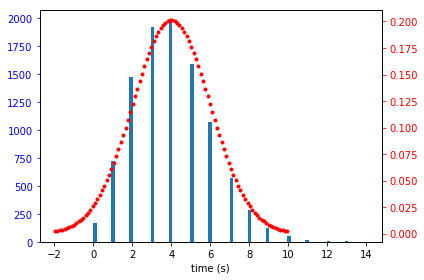

mean:  4.0
standard deviation: 1.9840362899906845


In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.hist(dist, bins='auto');
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(xnorm,mlab.normpdf(xnorm, mu, sigma), 'r.')
ax2.set_ylabel('', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()


print("mean: ", mu)
print("standard deviation:" ,sigma)

In [7]:
def Generate2(N):
    k = 0
    net = []
    for i in range(4):
        net.append(Node())
    for x in net:
        for y in net:
            if x != y:
                if x not in y.neighbours:
                    x.neighbours.append(y)
                    y.neighbours.append(x)  
    while(len(net)<10000):
        new = Node()
        net.append(new)
        while(len(new.neighbours)<4):
            n2 = net[random.randint(0,len(net)-1)]
            if new not in n2.neighbours:
                if new != n2:
                    new.neighbours.append(n2)
                    n2.neighbours.append(new)
    return net

In [8]:
net2 = Generate2(10000)

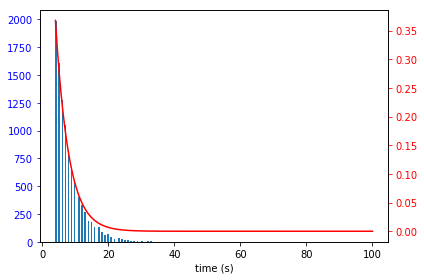

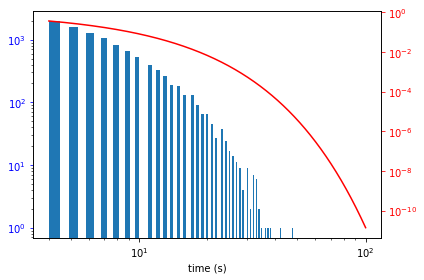

In [74]:
import matplotlib.pyplot as plt
from pylab import figure, show, legend, ylabel
dist = []
for n in net2:
    dist.append(len(n.neighbours))


import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.hist(dist, bins='auto');
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

#x = np.linspace(4,100,1000)
#y = np.exp(-x/4)


ax2.plot(x,y, 'r')
ax2.set_ylabel('', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()


fig, ax1 = plt.subplots()

ax1.hist(dist, bins='auto');
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xscale("log")
ax1.set_yscale("log")

ax2 = ax1.twinx()

#x = np.linspace(4,100,1000)
#y = np.exp(-x/4)


ax2.plot(x,y, 'r')
ax2.set_ylabel('', color='r')
ax2.tick_params('y', colors='r')
ax2.set_xscale("log")
ax2.set_yscale("log")

fig.tight_layout()
plt.show()
# on lineaer scale it looks good but on the log scale it doesn't


In [ ]:
print(dist)

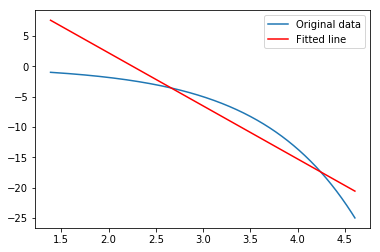

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
x2 = np.log(x)
y2 = np.log(y)



plt.plot(x2, y2, '', label='Original data', markersize=1)
plt.plot(x2, m*x2 + c, 'r', label='Fitted line')
plot.set_xscale('log')
plot.set_yscale('log')

plt.legend()
plt.show()

In [72]:
import random

class Prisonners_Dilemma():
    def __init__(self, G, T):
        self.G = G
        self.R = 1              # Both cooperate
        self.P = 0              # Both Defect
        self.S = -0.1           # Coopedate but the other defects
        self.T = T              # Defect but the other cooperates
        self.dmax = max(self.T, self.R) - min(self.S, self.P)

        self.stock = []

        # playoff[what I do, what the other does] 
        self.payoff_matrix = [[self.R, self.S],
                              [self.T, self.P]]
        #self.strategy = {0:"cooperate", 1:"Defect"}

        self.players_payoff   = {}
        self.players_strategy = {}
        for node in self.G.nodes():
            self.players_payoff[node] = 0
            if random.random() > 0.5:
                self.players_strategy[node] = 0 # Cooperate
            else:
                self.players_strategy[node] = 1 # Defect


        previous = self.stab()
        present = 0

        consecutive_cnt = 0
        while consecutive_cnt < 10:
            self.clear_payoffs()
            self.play()
            self.update()

            present = self.stab()
            #
            print(abs(previous-present))
            # 
            if abs(previous-present) < 0.001:
                consecutive_cnt += 1
            else:
                consecutive_cnt = 0
            previous = present




    def stab(self):
        cooperate = 0 
        total = 0
        for player, pvalue in self.players_strategy.items():
            if pvalue == 0:
                cooperate += 1
            total += 1
        self.stock.append(cooperate/total)
        return cooperate/total
def play(self):
        for edge in self.G.edges():
            player1 = edge[0]
            player2 = edge[1]

            player1Strat = self.players_strategy[player1]
            player2Strat = self.players_strategy[player2]

            player1Payoff = self.payoff_matrix[player1Strat][player2Strat]
            player2Payoff = self.payoff_matrix[player2Strat][player1Strat]

            print("antes", self.players_payoff[player1])

            self.players_payoff[player1] += player1Payoff
            self.players_payoff[player2] += player2Payoff

            print("depois", self.players_payoff[player1])
def update(self):
        for player, pvalue in self.players_payoff.items():
            print(player, pvalue)

            # Get random neighbour
            if list(self.G.neighbors(player)):
                neighbour = random.choice(list(self.G.neighbors(player)))            
                if random.random() < self.prob(player, neighbour):
                    self.players_strategy[player] = self.players_strategy[neighbour]
def prob(self, player, neighbour):
     p = (self.players_payoff[neighbour]-self.players_payoff[player]) / (max(self.G.degree(player), self.G.degree(neighbour)) * self.dmax)
     return p

def clear_payoffs(self):
        for player, pvalue in self.players_payoff.items():
            self.players_payoff[player] = 0
      